<h1 style="color:blue">Cancer Diagnosis Prediction - ML Feature Engineering & Model Development</h1>

# Dataset


<a href="https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic">Breast Cancer Wisconsin (Diagnostic)</a>


<a href="https://github.com/uci-ml-repo/ucimlrepo/tree/main">github: ucimlrepo package</a>



Citation: Wolberg,William, Mangasarian,Olvi, Street,Nick, and Street,W.. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

**Additional Variable Information**
1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

# 1. Import

In [1]:
# Reload modules
%load_ext autoreload
%autoreload 2 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# dotenv import
from dotenv import load_dotenv
import os
from tqdm.auto import tqdm

# Datasets
from ucimlrepo import fetch_ucirepo, list_available_datasets # Libraries for Breast Camcer dataset 

# ML - Save & Load
import pickle

# ML - Feature Engineering
from sklearn.preprocessing import MinMaxScaler #StandardScaler
from sklearn.model_selection import train_test_split

# ML - Model Development
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC

# ML - Model Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score
from sklearn.model_selection import cross_val_score


# Import Module
from utils.functions import * # Import Functions


# 2. Breast Cancer Dataset - Load Data

In [3]:
df_clean = pd.read_csv('../data/cleaned/df_clean.csv')

In [4]:
df_clean.drop(columns=['ID'], inplace=True)

In [5]:
df_clean.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# 3. Breast Cancer Dataset - Feature Engineering

## 3.1 Train Test Split

In [6]:
df_clean.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [7]:
features = df_clean.drop(columns = ["Diagnosis"])
target = df_clean["Diagnosis"]

In [8]:
# Split df into train set and new set
X_train, X_new, y_train, y_new = train_test_split(features, target, test_size = 0.30, random_state=0)

In [9]:
# Split new into test set and validation set
# the validation set is meant to test 
X_test, X_val, y_test, y_val = train_test_split(features, target, test_size = 0.50, random_state=0)

## 3.2 Normalization

In [10]:
# Create an instance of the class MinMaxScaler normalizer
scaler = MinMaxScaler()

In [11]:
# Apply the `.fit()` class method **ONLY** to the train set.
scaler.fit(X_train) # what are max and min of every column

MinMaxScaler()

In [12]:
# Save Scaler
with open("../machine_learning/scalers/min_max_scaler.pickle", "wb") as file:
    pickle.dump(scaler, file)

In [13]:
# Tranform train set and test set
X_train_norm = scaler.transform(X_train) # transfomred to numpy arrays
X_test_norm = scaler.transform(X_test)

In [14]:
# Convert numpy array to pandas df
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,0.213403,0.202490,0.208693,0.110880,0.564462,0.215396,0.124367,0.097863,0.363131,0.332350,...,0.159018,0.263326,0.157528,0.069406,0.422836,0.168534,0.234932,0.255977,0.271240,0.241112
1,0.166075,0.369295,0.159422,0.080933,0.588357,0.162318,0.053819,0.088469,0.213131,0.337826,...,0.111348,0.333689,0.101350,0.046746,0.463118,0.074813,0.076226,0.224871,0.127735,0.153352
2,0.249373,0.341494,0.238270,0.134380,0.368307,0.162352,0.091026,0.115855,0.459596,0.259478,...,0.201352,0.351812,0.180238,0.093148,0.333686,0.146996,0.175837,0.282845,0.305145,0.172373
3,0.536182,0.368050,0.516965,0.380700,0.361138,0.223615,0.191401,0.288966,0.283333,0.090354,...,0.475987,0.382196,0.442203,0.301022,0.344912,0.210738,0.320181,0.541164,0.323477,0.094057
4,0.000000,0.154357,0.000000,0.000000,0.699142,0.192795,0.000000,0.000000,0.439394,0.594356,...,0.000000,0.200426,0.000000,0.000000,0.576042,0.090142,0.000000,0.000000,0.269466,0.254362


In [15]:
# Convert numpy array to pandas df
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,0.335037,0.309959,0.317601,0.197497,0.302161,0.117218,0.062816,0.161581,0.293434,0.161752,...,0.248666,0.355011,0.229145,0.122714,0.233969,0.092955,0.076561,0.272511,0.188843,0.072478
1,0.692366,0.521577,0.695253,0.535949,0.695884,0.648312,0.658388,0.776342,0.556566,0.339090,...,0.651014,0.445629,0.605558,0.465936,0.521891,0.528189,0.638281,0.834309,0.446087,0.299488
2,0.192106,0.216598,0.185751,0.097222,0.295862,0.176050,0.083083,0.103082,0.476263,0.263269,...,0.147990,0.234808,0.146023,0.064368,0.253120,0.165818,0.140543,0.232656,0.322689,0.116949
3,0.577358,0.530290,0.578467,0.426087,0.354078,0.422642,0.261012,0.336581,0.357071,0.112258,...,0.548915,0.534115,0.577668,0.369347,0.403024,0.516935,0.349774,0.588357,0.320915,0.243802
4,0.232808,0.204979,0.237164,0.122715,0.679592,0.377440,0.086926,0.149254,0.472222,0.598778,...,0.185699,0.119670,0.178545,0.079729,0.470382,0.217724,0.085249,0.208130,0.229056,0.318510


## 3.3 Feature Selection

### 3.3.1 Univariate Feature Selection

In [16]:
help(univariate_feat_selection)

Help on function univariate_feat_selection in module utils.functions:

univariate_feat_selection(df: pandas.core.frame.DataFrame, alpha: int = 0.05)
    The function calculates the class mean for each feature and validates if the difference is significant or not. 
    Features for which the difference is not significant will be stored in a list.
    The list will be returned.
    Required:
        Dataframe with target column called "Diagnosis"
    Optional:
        value for alpha



In [17]:
univar_drop_cols = univariate_feat_selection(df_clean)

The feature >>fractal_dimension1<< does NOT show a significant difference between the class means (p-value: 0.7667)
The feature >>texture2<< does NOT show a significant difference between the class means (p-value: 0.8354)
The feature >>smoothness2<< does NOT show a significant difference between the class means (p-value: 0.1053)
The feature >>symmetry2<< does NOT show a significant difference between the class means (p-value: 0.8871)


### 3.3.2 Feature Selection - Remove features with high correlation between features and "lower" correlation to target

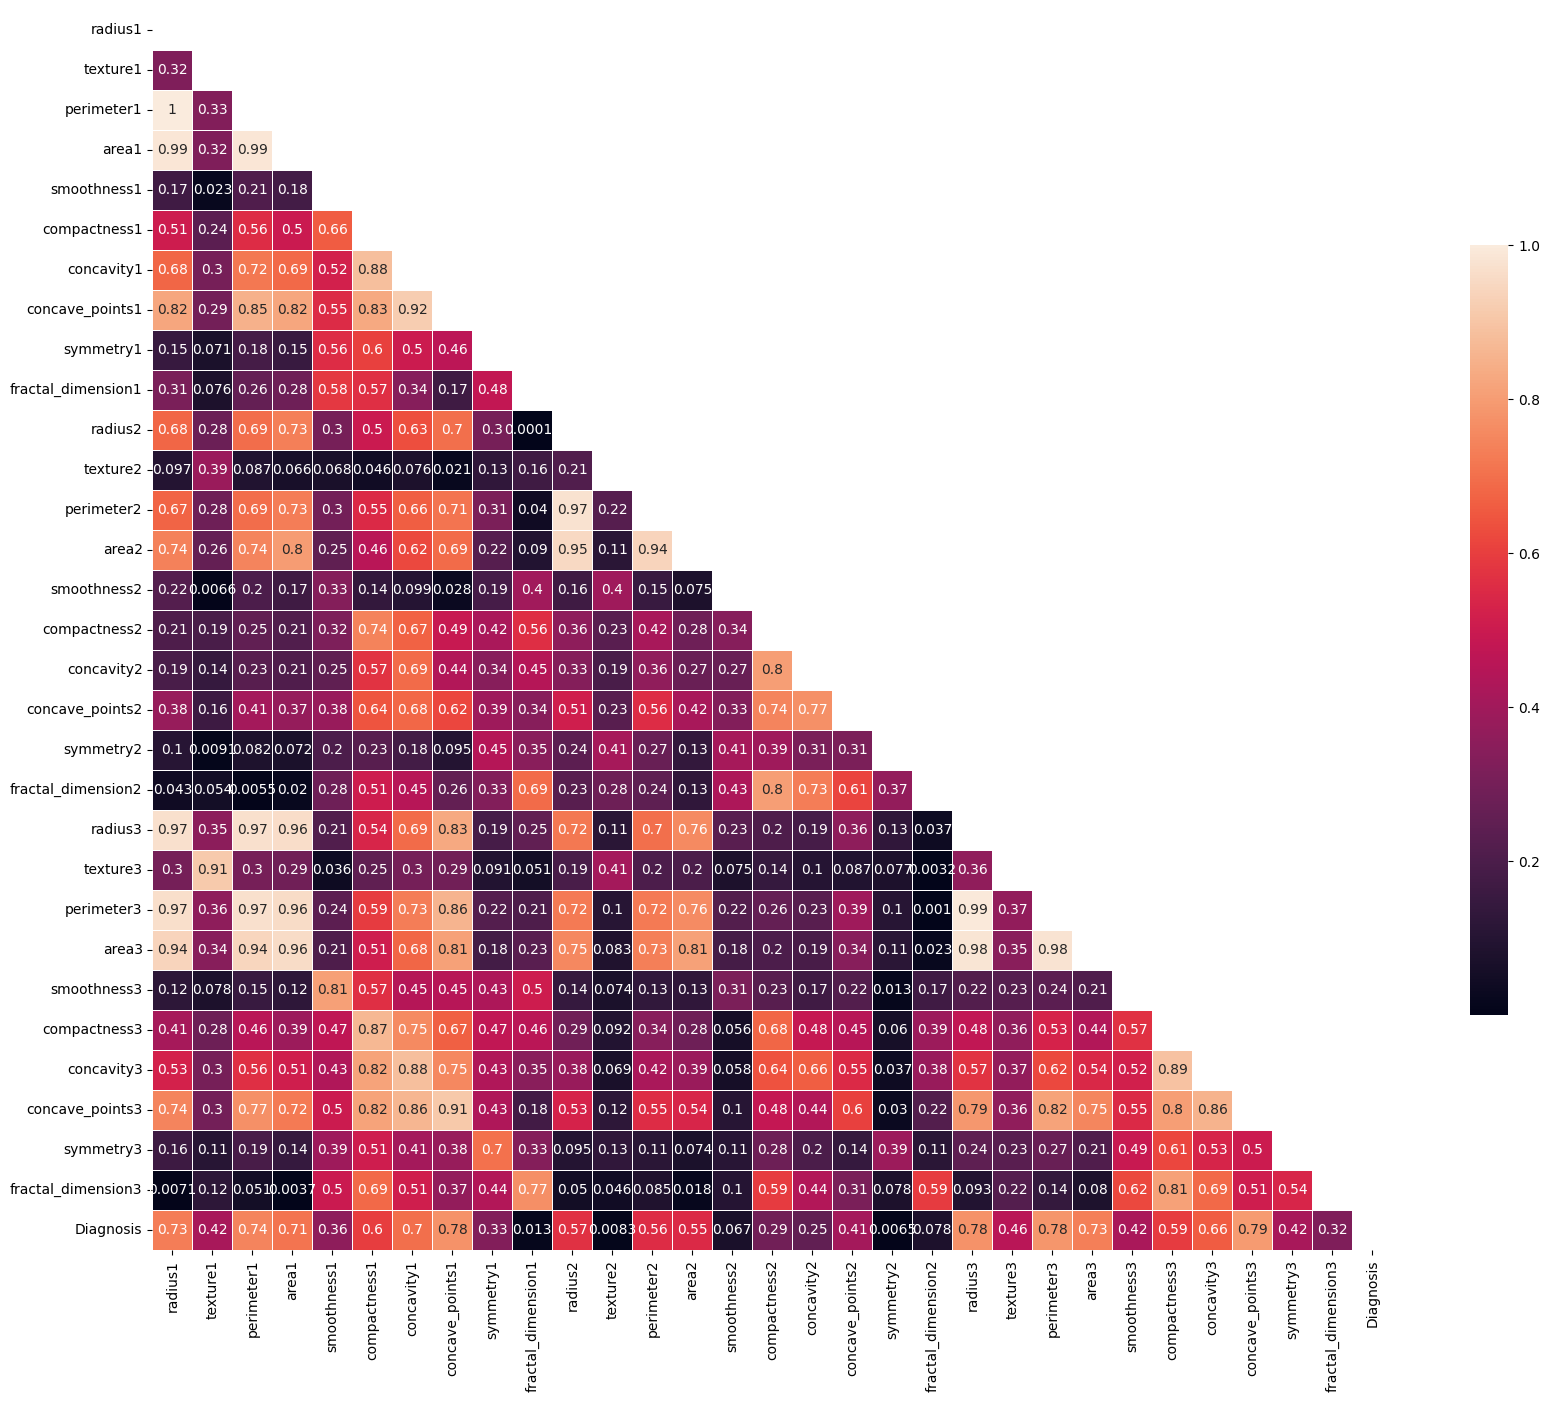

In [18]:
# Heatmap 1

corr=np.abs(df_clean.corr()) #corr(x,y) = corr(y,x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [19]:
type(corr)

pandas.core.frame.DataFrame

In [20]:
# Filter correlations higher than or equal to 0.8
high_corr = corr[(corr >= 0.8) & (corr < 1)]
high_corr.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
radius1,NaN,NaN,0.997855,0.987357,NaN,NaN,NaN,0.822529,NaN,NaN,...,NaN,0.965137,0.941082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
texture1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.912045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
perimeter1,0.997855,NaN,NaN,0.986507,NaN,NaN,NaN,0.850977,NaN,NaN,...,NaN,0.970387,0.941550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area1,0.987357,NaN,0.986507,NaN,NaN,NaN,NaN,0.823269,NaN,NaN,...,NaN,0.959120,0.959213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoothness1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.805324,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Reshape the dataframe using stack method
# https://www.geeksforgeeks.org/reshape-a-pandas-dataframe-using-stackunstack-and-melt-method/

high_corr_stacked = high_corr.stack().reset_index()
high_corr_stacked.columns = ['feature_1', 'feature_2', 'correlation']

high_corr_stacked.shape

(88, 3)

In [22]:
help(keep_unique_corr_pairs)

Help on function keep_unique_corr_pairs in module utils.functions:

keep_unique_corr_pairs(corr_matrix_stacked: pandas.core.frame.DataFrame)
    Function to remove duplicate correlation pairs from a stacked correlation matrix.
    Returns dataframe with unique correlation pairs
    Required columns:
        feature_1
        feature_2
        correlation



In [23]:
# Only keep unique pairs
df_corr_unique = keep_unique_corr_pairs(high_corr_stacked)

df_corr_unique.shape

C:\Users\andre\Documents\IRONHACK\UNIT_8\Project\Cancer_Diagnosis_Prediction\notebooks\utils\functions.py:93: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_corr_unique = pd.concat([df_corr_unique, temp_df], ignore_index=True)


(44, 3)

In [24]:
df_corr_unique[(df_corr_unique['feature_1']=='texture3') | (df_corr_unique['feature_2']=='texture3')]

,feature_1,feature_2,correlation
6,texture1,texture3,0.912045


In [25]:
df_corr_unique['feature_1'].unique()

array(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'radius2',
       'perimeter2', 'area2', 'compactness2', 'radius3', 'perimeter3',
       'compactness3', 'concavity3'], dtype=object)

In [26]:
df_corr_unique['feature_2'].unique()

array(['perimeter1', 'area1', 'concave_points1', 'radius3', 'perimeter3',
       'area3', 'texture3', 'area2', 'smoothness3', 'concavity1',
       'compactness3', 'concavity3', 'concave_points3', 'perimeter2',
       'concavity2', 'fractal_dimension2', 'fractal_dimension3'],
      dtype=object)

In [27]:
help(get_feat_with_high_cross_corr)

Help on function get_feat_with_high_cross_corr in module utils.functions:

get_feat_with_high_cross_corr(corr_matrix: pandas.core.frame.DataFrame, corr_matrix_stacked: pandas.core.frame.DataFrame)
    Get feature that has the lowest correlation with the target from the the high correlation feature pair.
    Returns list with with features to DROP.
    Required dataframes:
        - corrleation matrix
        - stacked correlation matrix
    Required columns:
        feature_1
        feature_2
        correlation



In [28]:
# Get feature that has the lowest correlation with the target from the the high correlation feature pair
drop_cols = get_feat_with_high_cross_corr(corr, df_corr_unique)

In [29]:
for i in range(len(drop_cols)):
    print(f"Feature >>{drop_cols[i]}<< shows correlation with other features and has a low correlation with the target")

Feature >>radius1<< shows correlation with other features and has a low correlation with the target
Feature >>texture1<< shows correlation with other features and has a low correlation with the target
Feature >>area1<< shows correlation with other features and has a low correlation with the target
Feature >>perimeter1<< shows correlation with other features and has a low correlation with the target
Feature >>smoothness1<< shows correlation with other features and has a low correlation with the target
Feature >>compactness1<< shows correlation with other features and has a low correlation with the target
Feature >>concavity1<< shows correlation with other features and has a low correlation with the target
Feature >>radius3<< shows correlation with other features and has a low correlation with the target
Feature >>concave_points1<< shows correlation with other features and has a low correlation with the target
Feature >>perimeter2<< shows correlation with other features and has a low cor

In [30]:
# Drop columns 
df_selected = df_clean.drop(columns = drop_cols)

### 3.3.3 Feature Selection - Remove features with low correlation to target (<0.1)

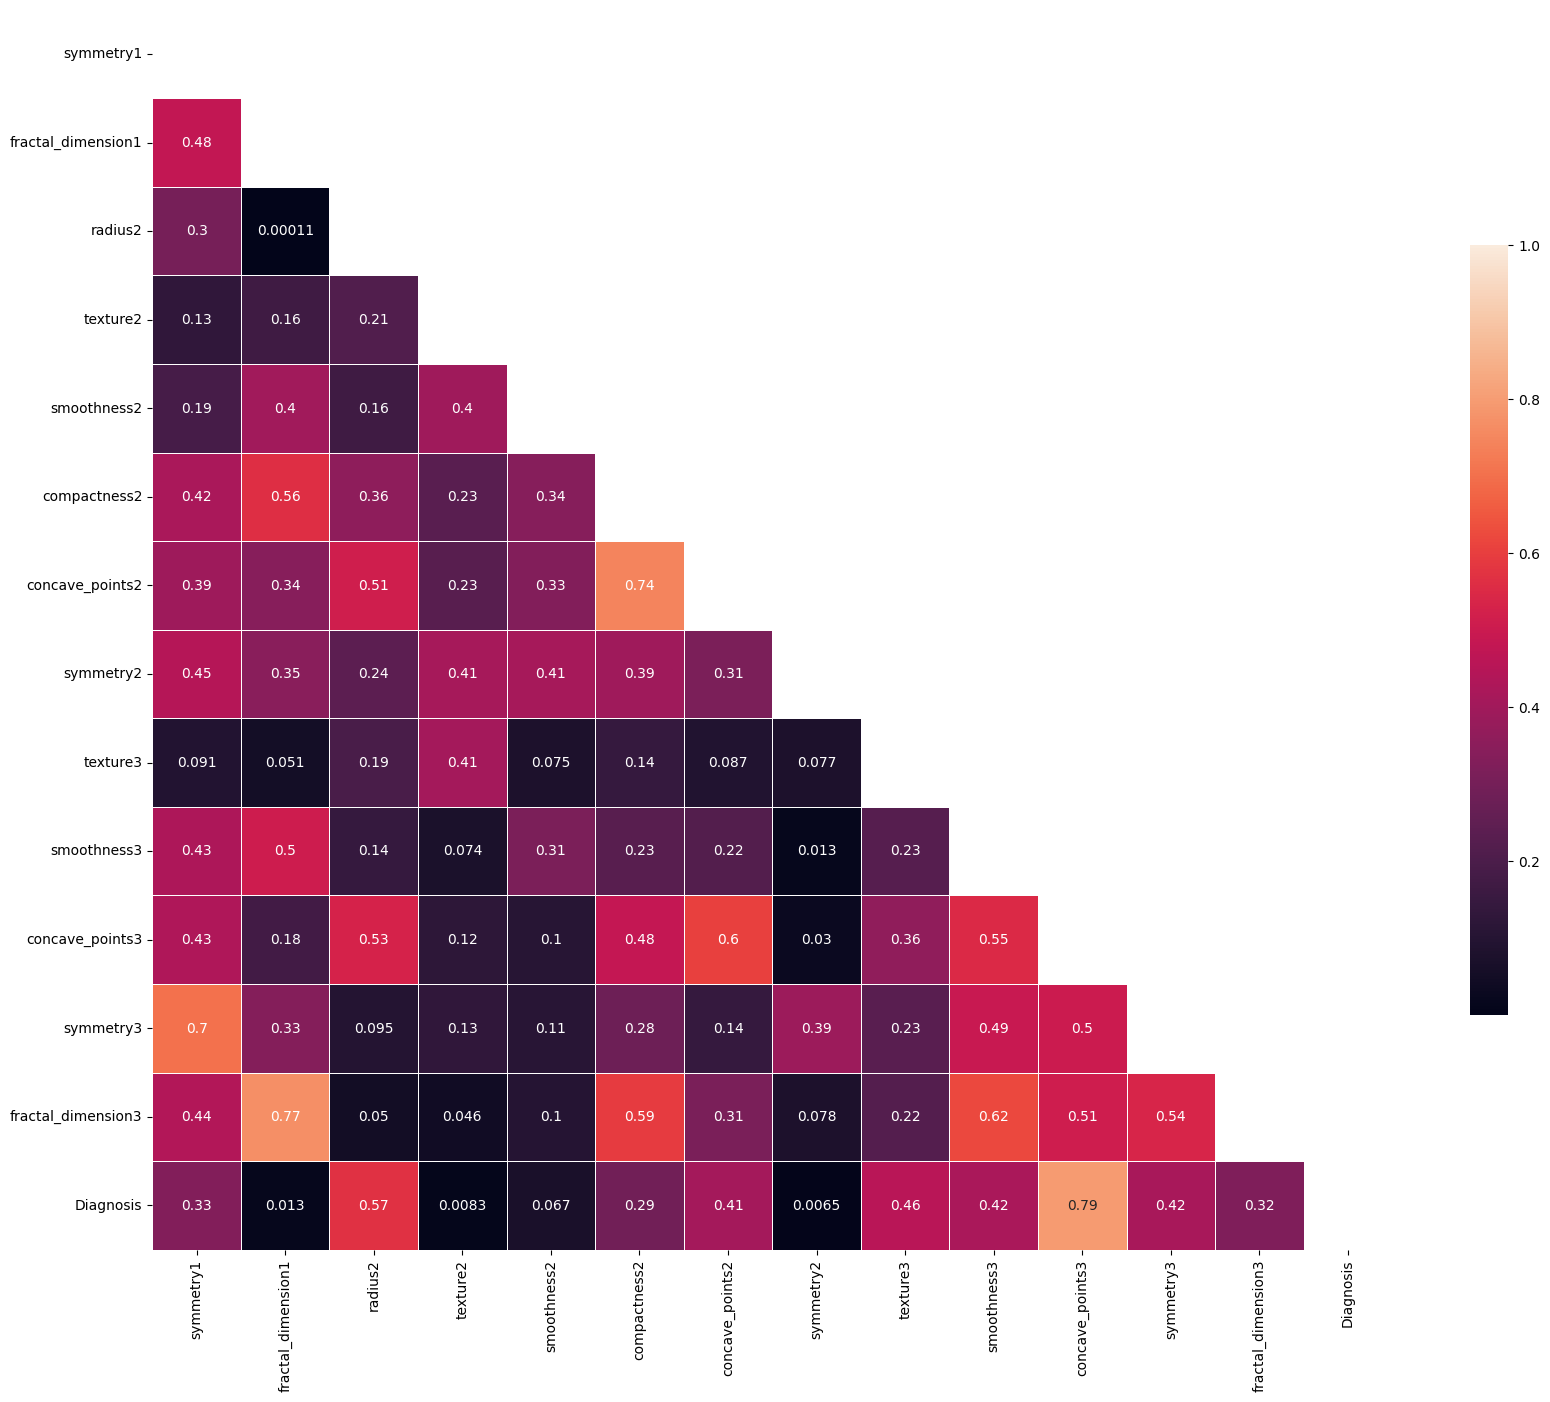

In [31]:
# Heatmap 2

corr_2=np.abs(df_selected.corr()) #corr(x,y) = corr(y,x), corr(x,x) = 1

#Set up mask for triangle representation
mask_2 = np.zeros_like(corr_2, dtype=bool)
mask_2[np.triu_indices_from(mask_2)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_2, mask=mask_2,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr_2)

plt.show()

In [32]:
corr_2

,symmetry1,fractal_dimension1,radius2,texture2,smoothness2,compactness2,concave_points2,symmetry2,texture3,smoothness3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
symmetry1,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,0.393298,0.449137,0.090651,0.426675,0.430297,0.699826,0.438413,0.330499
fractal_dimension1,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,0.341198,0.345007,0.051269,0.504942,0.175325,0.334019,0.767297,0.012838
radius2,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,0.513346,0.240567,0.194799,0.141919,0.531062,0.094543,0.049559,0.567134
texture2,0.128053,0.164174,0.213247,1.000000,0.397243,0.231700,0.230283,0.411621,0.409003,0.073658,0.119638,0.128215,0.045655,0.008303
smoothness2,0.187321,0.401964,0.164514,0.397243,1.000000,0.336696,0.328429,0.413506,0.074743,0.314457,0.102007,0.107342,0.101480,0.067016
compactness2,0.421659,0.559837,0.356065,0.231700,0.336696,1.000000,0.744083,0.394713,0.143003,0.227394,0.483208,0.277878,0.590973,0.292999
concave_points2,0.393298,0.341198,0.513346,0.230283,0.328429,0.744083,1.000000,0.312780,0.086741,0.215351,0.602450,0.143116,0.310655,0.408042
symmetry2,0.449137,0.345007,0.240567,0.411621,0.413506,0.394713,0.312780,1.000000,0.077473,0.012662,0.030413,0.389402,0.078079,0.006522
texture3,0.090651,0.051269,0.194799,0.409003,0.074743,0.143003,0.086741,0.077473,1.000000,0.225429,0.359755,0.233027,0.219122,0.456903
smoothness3,0.426675,0.504942,0.141919,0.073658,0.314457,0.227394,0.215351,0.012662,0.225429,1.000000,0.547691,0.493838,0.617624,0.421465


In [33]:
df_selected.shape

(569, 14)

In [34]:
help(rmv_feat_with_low_corr_to_target)

Help on function rmv_feat_with_low_corr_to_target in module utils.functions:

rmv_feat_with_low_corr_to_target(corr_matrix: pandas.core.frame.DataFrame)
    Remove features that have the lowest correlation with the target. 
    Returns list with with features to KEEP.
    Required dataframes:
        - corrleation matrix



In [35]:
keep_cols = rmv_feat_with_low_corr_to_target(corr_2)
keep_cols

['symmetry1',
 'radius2',
 'compactness2',
 'concave_points2',
 'texture3',
 'smoothness3',
 'concave_points3',
 'symmetry3',
 'fractal_dimension3',
 'Diagnosis']

In [36]:
# Removing elements from keep_cols list present in univar_drop_cols list (see chapter: 3.3.1)
# using numpy.setdiff1d() function
res = np.setdiff1d(keep_cols, univar_drop_cols).tolist()
res

['Diagnosis',
 'compactness2',
 'concave_points2',
 'concave_points3',
 'fractal_dimension3',
 'radius2',
 'smoothness3',
 'symmetry1',
 'symmetry3',
 'texture3']

In [37]:
df_selected = df_selected.loc[:, res]
df_selected.shape

(569, 10)

In [38]:
df_selected.columns

Index(['Diagnosis', 'compactness2', 'concave_points2', 'concave_points3',
       'fractal_dimension3', 'radius2', 'smoothness3', 'symmetry1',
       'symmetry3', 'texture3'],
      dtype='object')

### 3.3.4 Feature Selection - Remove features with columns from train and test set

In [39]:
X_train_reduced = X_train_norm.loc[:, df_selected.drop(columns=['Diagnosis']).columns]
X_test_reduced = X_test_norm.loc[:, df_selected.drop(columns=['Diagnosis']).columns]

In [40]:
X_train_reduced

,compactness2,concave_points2,concave_points3,fractal_dimension3,radius2,smoothness3,symmetry1,symmetry3,texture3
0,0.181357,0.152264,0.255977,0.241112,0.033279,0.422836,0.363131,0.271240,0.263326
1,0.068268,0.174256,0.224871,0.153352,0.013399,0.463118,0.213131,0.127735,0.333689
2,0.128356,0.150104,0.282845,0.172373,0.039290,0.333686,0.459596,0.305145,0.351812
3,0.066530,0.127278,0.541164,0.094057,0.052942,0.344912,0.283333,0.323477,0.382196
4,0.082460,0.000000,0.000000,0.254362,0.040775,0.576042,0.439394,0.269466,0.200426
...,...,...,...,...,...,...,...,...,...
393,0.085340,0.277136,0.445746,0.015283,0.078508,0.350855,0.247475,0.197516,0.327292
394,0.671333,0.271263,0.761281,1.000000,0.067391,0.753682,0.489899,0.552139,0.763859
395,0.064620,0.124361,0.174027,0.172635,0.143545,0.410289,0.225253,0.175241,0.346482
396,0.043054,0.000000,0.000000,0.069198,0.087778,0.000000,0.299495,0.067810,0.234808


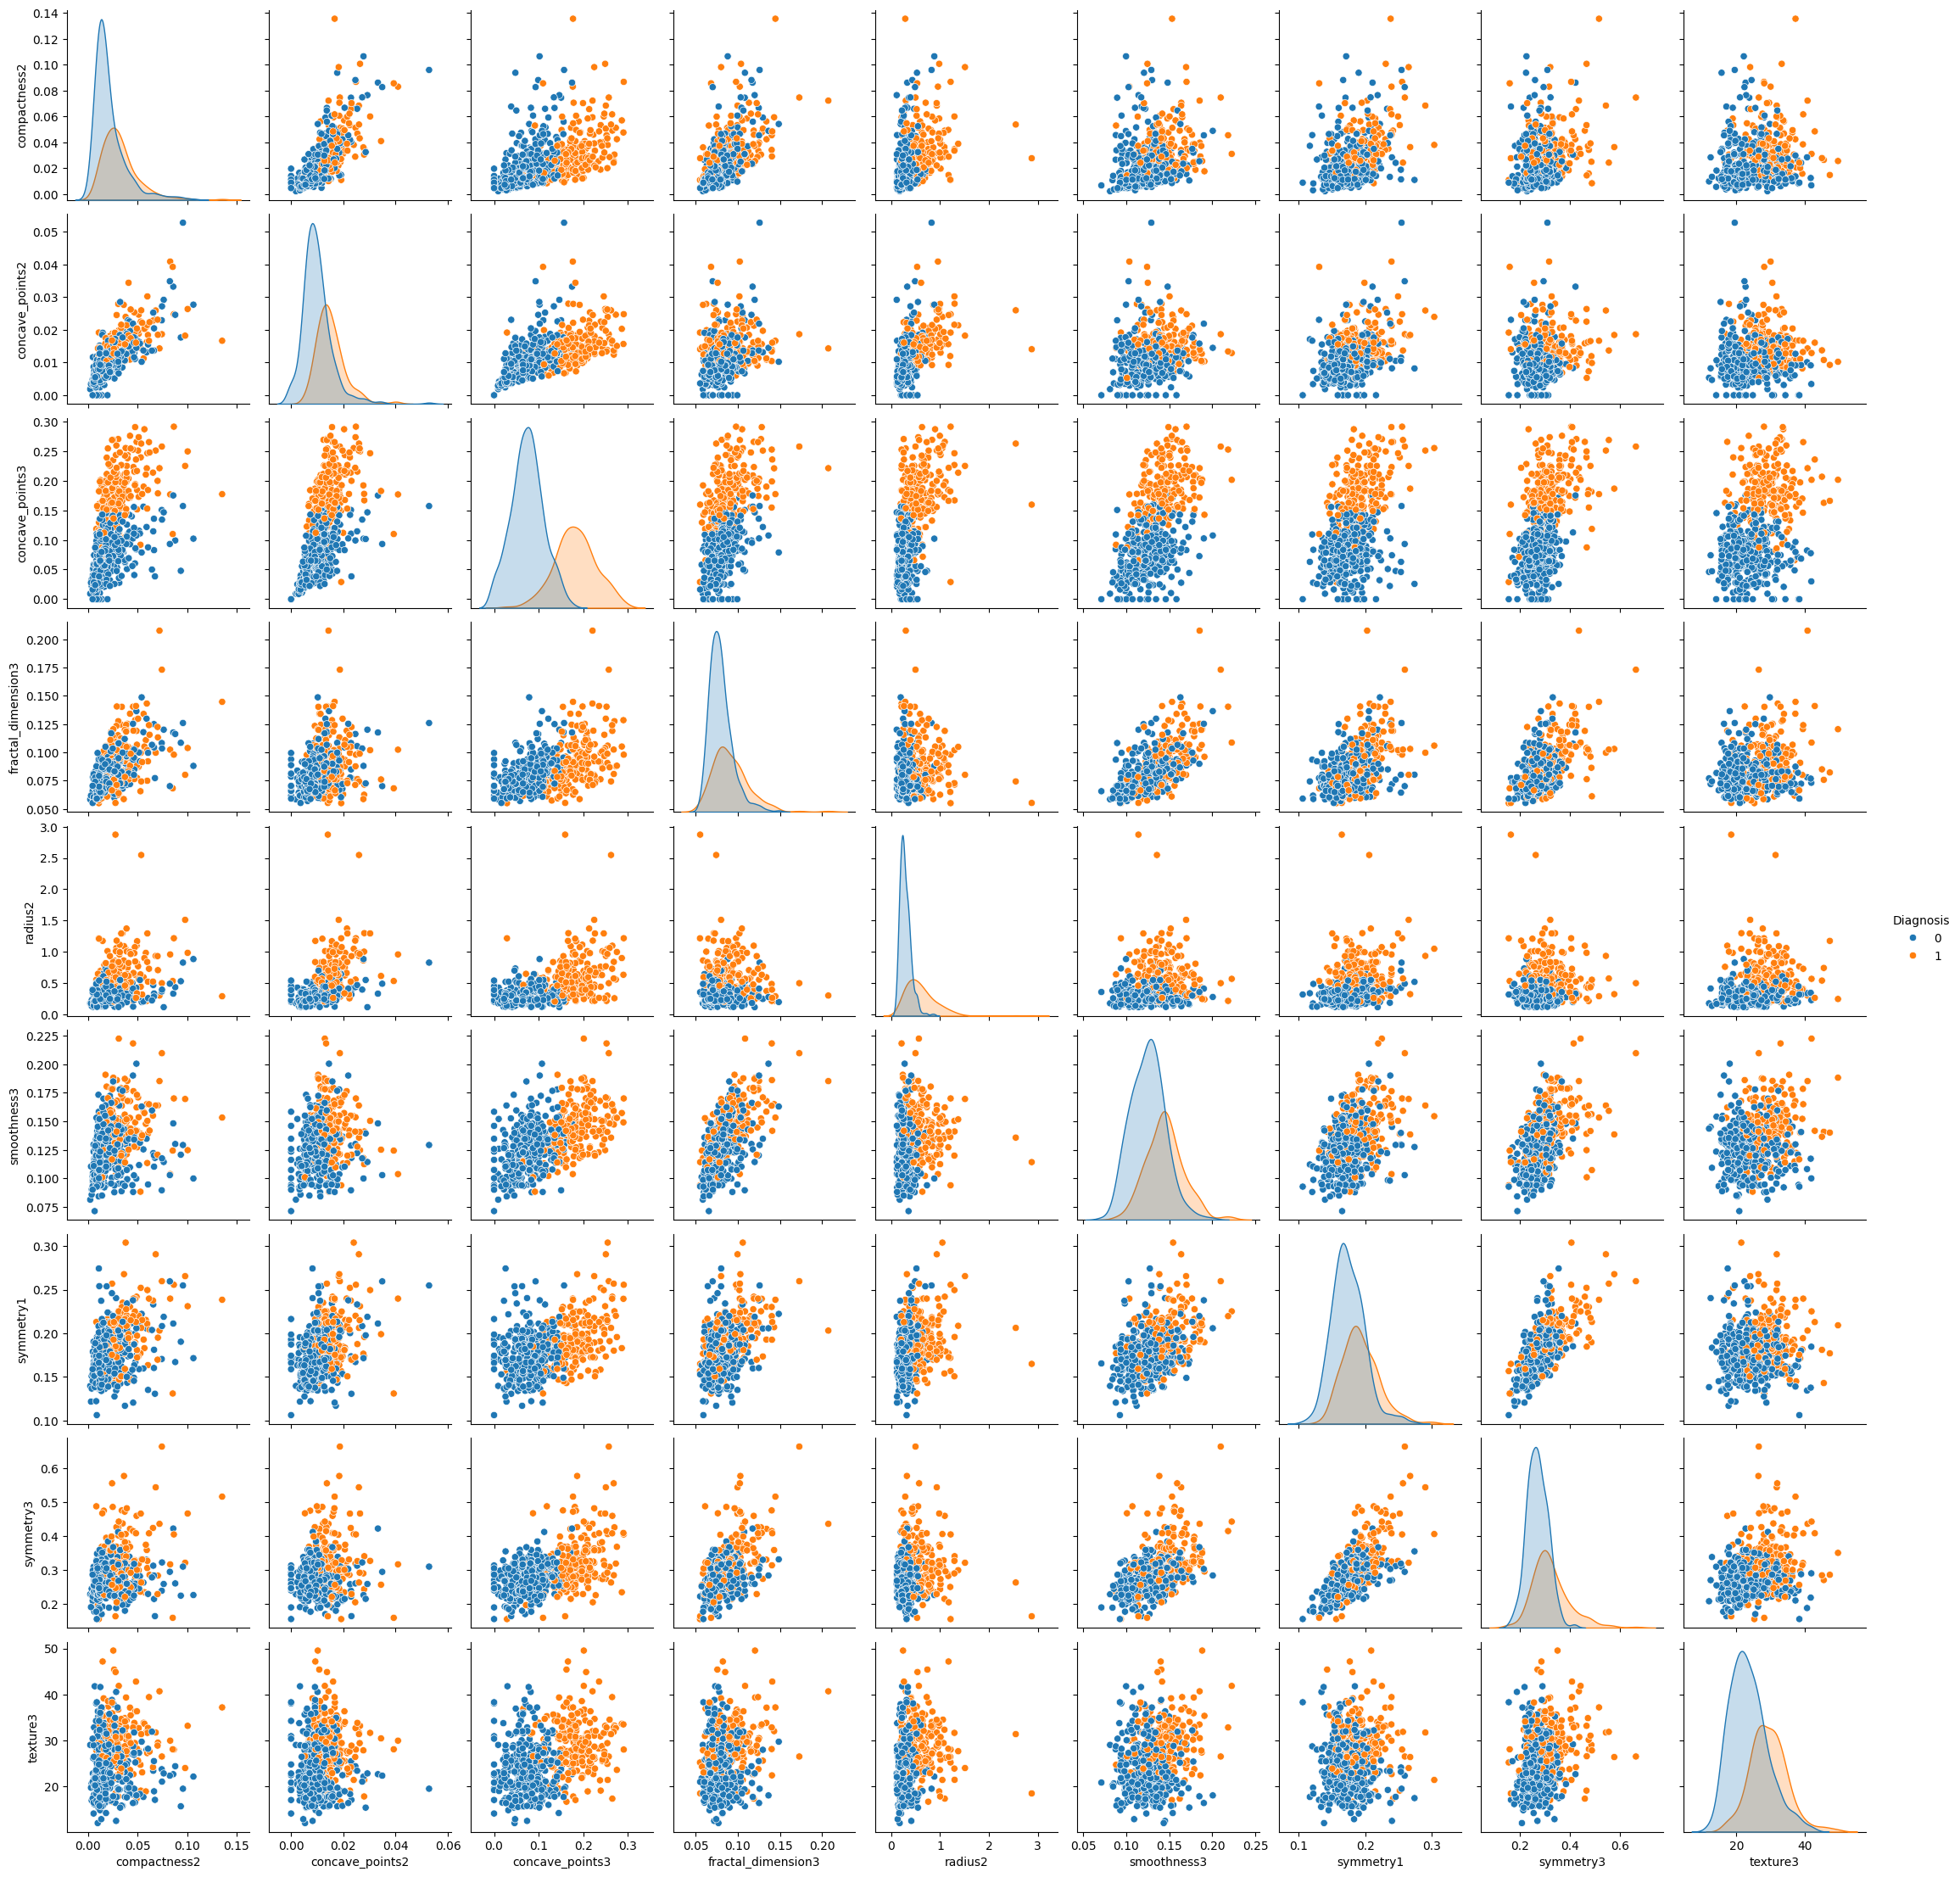

In [41]:
# Pair plot to visualize relationships between features
sns.pairplot(df_selected, hue='Diagnosis', diag_kind='kde')
plt.show()

## 3.4 Resolve Class Imbalance

-  a combination of over- and undersampling will be performed to handle class imbalance

-  Further Reading: https://medium.com/analytics-vidhya/undersampling-and-oversampling-an-old-and-a-new-approach-4f984a0e8392

In [42]:
# Resolve Class imbalance for y_train

# Reset Index of y_train
y_train_reset = y_train.reset_index(drop=True) ############ Please validate if the indexes and values are the same as in X_train_reduced below 

## Downsample majority class
majority_downsampled = y_train_reset[y_train_reset == 0].sample(n=199, replace=False)

## Oversample minority class
minority_oversampled = y_train_reset[y_train_reset == 1].sample(n=199, replace=True)

## Combine the samples
y_train_subset = pd.concat([majority_downsampled, minority_oversampled])

## Resort the index to maintain the original order
y_train_subset = y_train_subset.sort_index()


In [43]:
y_train_subset.value_counts()

Diagnosis
0    199
1    199
Name: count, dtype: int64

In [44]:
# Resolve Class imbalance for y_train
X_train_subset = X_train_reduced.loc[y_train_subset.index]

In [45]:
y_train_subset.index

Index([  0,   3,   4,   5,   6,   8,   8,   9,  10,  11,
       ...
       386, 386, 390, 391, 392, 394, 394, 395, 396, 397],
      dtype='int64', length=398)

In [46]:
X_train_subset.index

Index([  0,   3,   4,   5,   6,   8,   8,   9,  10,  11,
       ...
       386, 386, 390, 391, 392, 394, 394, 395, 396, 397],
      dtype='int64', length=398)

# 4. Breast Cancer Dataset - Model Development

## 4.1 Logistic Regression

In [47]:
# Create Instance of Logistic Regression Model
log_reg = LogisticRegression()

In [48]:
# Train Logisitc Regression Model with normalized data
#log_reg.fit(X_train_reduced, y_train)
log_reg.fit(X_train_subset, y_train_subset)

LogisticRegression()

In [111]:
# Save log_reg Model
with open("../machine_learning/models/log_reg.pickle", "wb") as file:
    pickle.dump(log_reg, file)

In [49]:
# Evaluate Model Performance - Prediction
pred_log = log_reg.predict(X_test_reduced)
pred_log

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [50]:
y_test.values

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
      dtype=int64)

In [51]:
# Evaluate Model Performance - Accuracy
print(f"The accuracy of the logistic model is {log_reg.score(X_test_reduced, y_test)*100: .2f}%")

The accuracy of the logistic model is  94.72%


In [52]:
# Evaluate Model Performance - Accuracy
print(f"The accuracy of the logistic model is {accuracy_score(y_test, pred_log)*100: .2f}%")

The accuracy of the logistic model is  94.72%


In [53]:
# Evaluate Model Performance - Precision
print(f"The precision of the logistic model is {precision_score(y_test, pred_log)*100: .2f}%")

The precision of the logistic model is  93.64%


In [54]:
# Evaluate Model Performance - Sensitivity
print(f"The sensitivity of the logistic model is {recall_score(y_test, pred_log)*100: .2f}%")

The sensitivity of the logistic model is  92.79%


In [55]:
# Evaluate Model Performance - Ground Truth (Kappa Coef)
print(f"The Cohen's kappa coef of the logistic model is {cohen_kappa_score(y_test, pred_log)}.")

The Cohen's kappa coef of the logistic model is 0.8889004798664719.


In [56]:
# Get highest Impact Feature By Coef
# https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1

log_reg_coef = {feature : np.abs(coef) for feature, coef in zip(X_train_subset.columns, log_reg.coef_[0])}

dict(sorted(log_reg_coef.items(), key=lambda item: item[1], reverse=True))

{'concave_points3': 6.892028197795904,
 'radius2': 3.2289249194420355,
 'texture3': 2.5512414728773374,
 'symmetry3': 1.208102895924933,
 'smoothness3': 1.0441878977470758,
 'symmetry1': 0.49614059691807877,
 'concave_points2': 0.41256388109881686,
 'compactness2': 0.1893812650028951,
 'fractal_dimension3': 0.1375384868669467}

## 4.2 Random Patches

In [57]:
# Create Instance of Random Forest Model
random_forest = RandomForestClassifier(n_estimators=100, max_depth=20)

In [58]:
# Train Random Forest Model with normalized data
#random_forest.fit(X_train_reduced, y_train)
random_forest.fit(X_train_subset, y_train_subset)

RandomForestClassifier(max_depth=20)

In [112]:
# Save random_forest Model
with open("../machine_learning/models/random_forest.pickle", "wb") as file:
    pickle.dump(random_forest, file)

In [59]:
# Evaluate Model Performance - Prediction
pred_random_f = random_forest.predict(X_test_reduced)
pred_random_f

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [60]:
# Evaluate Model Performance - Accuracy
print(f"The accuracy of the Random Forest model is {accuracy_score(y_test, pred_random_f)*100: .2f}%")

The accuracy of the Random Forest model is  98.59%


In [61]:
# Evaluate Model Performance - Precision
print(f"The precision of the Random Forest model is {precision_score(y_test, pred_random_f)*100: .2f}%")

The precision of the Random Forest model is  100.00%


In [62]:
# Evaluate Model Performance - Sensitivity
print(f"The sensitivity of the Random Forest model is {recall_score(y_test, pred_random_f)*100: .2f}%")

The sensitivity of the Random Forest model is  96.40%


In [63]:
# Evaluate Model Performance - Ground Truth (Kappa Coef)
print(f"The Cohen's kappa coef of the Random Forest model is {cohen_kappa_score(y_test, pred_random_f)}.")

The Cohen's kappa coef of the Random Forest model is 0.9702290476440065.


## 4.3 AdaBoost

In [64]:
# Create Instance of AdaBoost Model
ada_class = AdaBoostClassifier(RandomForestClassifier(max_depth=20),n_estimators=100, algorithm='SAMME')

In [65]:
# Train AdaBoost with normalized data
#ada_class.fit(X_train_reduced, y_train)
ada_class.fit(X_train_subset, y_train_subset)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(max_depth=20),
                   n_estimators=100)

In [113]:
# Save ada_class Model
with open("../machine_learning/models/ada_class.pickle", "wb") as file:
    pickle.dump(ada_class, file)

In [66]:
# Evaluate Model Performance - Prediction
pred_ada = ada_class.predict(X_test_reduced)
pred_ada

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [67]:
# Evaluate Model Performance - Accuracy
print(f"The accuracy of the AdaBoost model is {accuracy_score(y_test, pred_ada)*100: .2f}%")

The accuracy of the AdaBoost model is  98.59%


In [68]:
# Evaluate Model Performance - Precision
print(f"The precision of the AdaBoost model is {precision_score(y_test, pred_ada)*100: .2f}%")

The precision of the AdaBoost model is  100.00%


In [69]:
# Evaluate Model Performance - Sensitivity
print(f"The sensitivity of the AdaBoost model is {recall_score(y_test, pred_ada)*100: .2f}%")

The sensitivity of the AdaBoost model is  96.40%


In [70]:
# Evaluate Model Performance - Ground Truth (Kappa Coef)
print(f"The Cohen's kappa coef of the AdaBoost model is {cohen_kappa_score(y_test, pred_ada)}.")

The Cohen's kappa coef of the AdaBoost model is 0.9702290476440065.


## 4.4 Support Vector Machines (SVM)

In [71]:
# Create Instance of SVM Model
svm = SVC()

In [72]:
# Train SVM with normalized data
# svm.fit(X_train_reduced, y_train)
svm.fit(X_train_subset, y_train_subset)

SVC()

In [114]:
# Save svm Model
with open("../machine_learning/models/svm.pickle", "wb") as file:
    pickle.dump(svm, file)

In [73]:
# Evaluate Model Performance - Prediction
pred_svm = svm.predict(X_test_reduced)
pred_svm

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [74]:
# Evaluate Model Performance - Accuracy
print(f"The accuracy of the SVM model is {accuracy_score(y_test, pred_svm)*100: .2f}%")

The accuracy of the SVM model is  95.77%


In [75]:
# Evaluate Model Performance - Precision
print(f"The precision of the SVM model is {precision_score(y_test, pred_svm)*100: .2f}%")

The precision of the SVM model is  95.41%


In [76]:
# Evaluate Model Performance - Sensitivity
print(f"The sensitivity of the SVM model is {recall_score(y_test, pred_svm)*100: .2f}%")

The sensitivity of the SVM model is  93.69%


In [77]:
# Evaluate Model Performance - Ground Truth (Kappa Coef)
print(f"The Cohen's kappa coef of the SVM model is {cohen_kappa_score(y_test, pred_svm)}.")

The Cohen's kappa coef of the SVM model is 0.910976438012643.


## 4.5 Model Performance Comparison

### 4.5.1 Model Performance Comparison - Accuracy

**Accuracy Scores**

In [96]:
# Models' Accuracy Scores
acc_sc_log = round(accuracy_score(y_test, pred_log)*100, 2)
print(f"The accuracy of the logistic regression model is {acc_sc_log}")

acc_random_f = round(accuracy_score(y_test, pred_random_f)*100, 2)
print(f"The accuracy of the random forest model is {acc_random_f}")

acc_ada = round(accuracy_score(y_test, pred_ada)*100, 2)
print(f"The accuracy of the ada boost model is {acc_ada}")

acc_svm = round(accuracy_score(y_test, pred_svm)*100, 2)
print(f"The accuracy of the svm model is {acc_svm}")

The accuracy of the logistic regression model is 94.72
The accuracy of the random forest model is 98.59
The accuracy of the ada boost model is 98.59
The accuracy of the svm model is 95.77


**Confidence Intervals (IC)**

In [79]:
# Models' Confidence Intervals (IC)
# https://stackoverflow.com/questions/35876508/evaluate-multiple-scores-on-sklearn-cross-val-score
## https://scikit-learn.org/0.17/modules/cross_validation.html
## https://stackoverflow.com/questions/54618725/scikit-learn-cross-validation-and-confidence-intervals
## https://machinelearningmastery.com/report-classifier-performance-confidence-intervals/
 

score_sc_log = cross_val_score(log_reg, X_train_subset, y_train_subset, cv=5, scoring='accuracy') # Cross validation from scikit-learn
mean_acc_sc_log = np.mean(score_sc_log) # mean accuracy
std_acc_sc_log = np.std(score_sc_log) # standard devieation
ci_sc_log = (mean_acc_sc_log - 1.96 * std_acc_sc_log, mean_acc_sc_log + 1.96 * std_acc_sc_log)# 95% confidence interval
print(f"The confidence interval of the logistic regression model is {ci_sc_log}")

score_random_f = cross_val_score(random_forest, X_train_subset, y_train_subset, cv=5, scoring='accuracy') # Cross validation from scikit-learn
mean_acc_random_f = np.mean(score_random_f) # mean accuracy
std_acc_random_f = np.std(score_random_f) # standard devieation
ci_random_f = (mean_acc_random_f - 1.96 * std_acc_random_f, mean_acc_random_f + 1.96 * std_acc_random_f) # 95% confidence interval
print(f"The confidence interval of the random forest model is {ci_random_f}")

score_ada = cross_val_score(ada_class, X_train_subset, y_train_subset, cv=5, scoring='accuracy') # Cross validation from scikit-learn
mean_acc_ada = np.mean(score_ada) # mean accuracy
std_acc_ada = np.std(score_ada) # standard devieation
ci_ada = (mean_acc_ada - 1.96 * std_acc_ada, mean_acc_ada + 1.96 * std_acc_ada) # 95% confidence interval
print(f"The confidence interval of the ada boost model is {ci_ada}")

score_svm = cross_val_score(svm, X_train_subset, y_train_subset, cv=5, scoring='accuracy') # Cross validation from scikit-learn
mean_acc_svm = np.mean(score_svm) # mean accuracy
std_acc_svm = np.std(score_svm) # standard devieation
ci_svm = (mean_acc_svm - 1.96 * std_acc_svm, mean_acc_svm + 1.96 * std_acc_svm) # 95% confidence interval
print(f"The confidence interval of the svm model is {ci_svm}")

The confidence interval of the logistic regression model is (0.8667262447079972, 0.9927674261780784)
The confidence interval of the random forest model is (0.9078731108487657, 0.9816205600373105)
The confidence interval of the ada boost model is (0.9032464291375174, 0.9761206594700776)
The confidence interval of the svm model is (0.8966481485610206, 0.987782231185815)


**Dotplot**

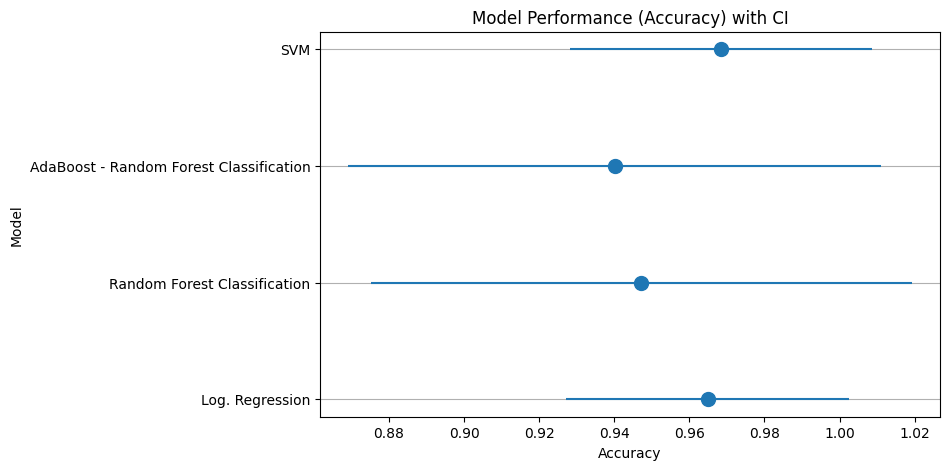

In [84]:
# List of models
model_names = ['Log. Regression', 'Random Forest Classification', 'AdaBoost - Random Forest Classification', 'SVM']

# List of accuracy scores
accuracy_scores = [mean_acc_sc_log, mean_acc_random_f, mean_acc_ada, mean_acc_svm]

# CI
ci = [1.96 * std_acc_sc_log, 1.96 * std_acc_random_f, 1.96 * std_acc_ada, 1.96 * std_acc_svm]

# Create dot plot (error bars = ci)
plt.figure(figsize=(8,5))
plt.errorbar(accuracy_scores, model_names, xerr=ci, fmt='o', markersize=10)

# Grid lines
plt.grid(axis='y')

# Labels & Titles
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Performance (Accuracy) with CI")

plt.show()

### 4.5.2 Model Performance Comparison - Precision

**Accuracy Scores**

In [98]:
# Models' Accuracy Scores
acc_sc_log = round(precision_score(y_test, pred_log)*100, 2)
print(f"The precision of the logistic regression model is {acc_sc_log}")

acc_random_f = round(precision_score(y_test, pred_random_f)*100, 2)
print(f"The precision of the random forest model is {acc_random_f}")

acc_ada = round(precision_score(y_test, pred_ada)*100, 2)
print(f"The precision of the ada boost model is {acc_ada}")

acc_svm = round(precision_score(y_test, pred_svm)*100, 2)
print(f"The precision of the svm model is {acc_svm}")

The accuracy of the logistic regression model is 93.64
The accuracy of the random forest model is 100.0
The accuracy of the ada boost model is 100.0
The accuracy of the svm model is 95.41


**Confidence Intervals (IC)**

In [101]:
# Models' Confidence Intervals (IC)
# https://stackoverflow.com/questions/35876508/evaluate-multiple-scores-on-sklearn-cross-val-score
## https://scikit-learn.org/0.17/modules/cross_validation.html
## https://stackoverflow.com/questions/54618725/scikit-learn-cross-validation-and-confidence-intervals
## https://machinelearningmastery.com/report-classifier-performance-confidence-intervals/
 

score_sc_log = cross_val_score(log_reg, X_train_subset, y_train_subset, cv=5, scoring='precision') # Cross validation from scikit-learn
mean_pre_sc_log = np.mean(score_sc_log) # mean accuracy
std_pre_sc_log = np.std(score_sc_log) # standard devieation
ci_sc_log = (mean_pre_sc_log - 1.96 * std_pre_sc_log, mean_pre_sc_log + 1.96 * std_pre_sc_log)# 95% confidence interval
print(f"The confidence interval of the logistic regression model is {ci_sc_log}")

score_random_f = cross_val_score(random_forest, X_train_subset, y_train_subset, cv=5, scoring='precision') # Cross validation from scikit-learn
mean_pre_random_f = np.mean(score_random_f) # mean accuracy
std_pre_random_f = np.std(score_random_f) # standard devieation
ci_random_f = (mean_pre_random_f - 1.96 * std_pre_random_f, mean_pre_random_f + 1.96 * std_pre_random_f) # 95% confidence interval
print(f"The confidence interval of the random forest model is {ci_random_f}")

score_ada = cross_val_score(ada_class, X_train_subset, y_train_subset, cv=5, scoring='precision') # Cross validation from scikit-learn
mean_pre_ada = np.mean(score_ada) # mean accuracy
std_pre_ada = np.std(score_ada) # standard devieation
ci_ada = (mean_pre_ada - 1.96 * std_pre_ada, mean_pre_ada + 1.96 * std_pre_ada) # 95% confidence interval
print(f"The confidence interval of the ada boost model is {ci_ada}")

score_svm = cross_val_score(svm, X_train_subset, y_train_subset, cv=5, scoring='precision') # Cross validation from scikit-learn
mean_pre_svm = np.mean(score_svm) # mean accuracy
std_pre_svm = np.std(score_svm) # standard devieation
ci_svm = (mean_pre_svm - 1.96 * std_pre_svm, mean_pre_svm + 1.96 * std_pre_svm) # 95% confidence interval
print(f"The confidence interval of the svm model is {ci_svm}")

The confidence interval of the logistic regression model is (0.8784312682897677, 1.0431013657428665)
The confidence interval of the random forest model is (0.8843164435298785, 1.0483200256919567)
The confidence interval of the ada boost model is (0.8957973116327107, 1.0461074502720513)
The confidence interval of the svm model is (0.8845656027338321, 1.048642725211338)


**Dotplot**

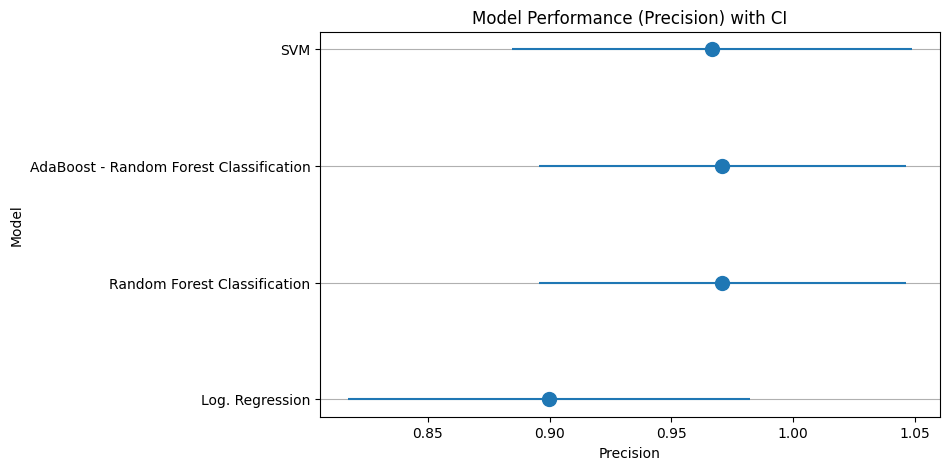

In [110]:
# List of models
model_names = ['Log. Regression', 'Random Forest Classification', 'AdaBoost - Random Forest Classification', 'SVM']

# List of accuracy scores
accuracy_scores = [mean_pre_sc_log, mean_pre_random_f, mean_pre_ada, mean_pre_svm]

# CI
ci = [1.96 * std_acc_sc_log, 1.96 * std_acc_random_f, 1.96 * std_acc_ada, 1.96 * std_acc_svm]

# Create dot plot (error bars = ci)
plt.figure(figsize=(8,5))
plt.errorbar(accuracy_scores, model_names, xerr=ci, fmt='o', markersize=10)

# Grid lines
plt.grid(axis='y')

# Labels & Titles
plt.xlabel("Precision")
plt.ylabel("Model")
plt.title("Model Performance (Precision) with CI")

plt.show()

### 4.5.2 Model Performance Comparison - Recall

**Accuracy Scores**

In [104]:
# Models' Accuracy Scores
acc_sc_log = round(recall_score(y_test, pred_log)*100, 2)
print(f"The sensitivity of the logistic regression model is {acc_sc_log}")

acc_random_f = round(recall_score(y_test, pred_random_f)*100, 2)
print(f"The sensitivity of the random forest model is {acc_random_f}")

acc_ada = round(recall_score(y_test, pred_ada)*100, 2)
print(f"The sensitivity of the ada boost model is {acc_ada}")

acc_svm = round(recall_score(y_test, pred_svm)*100, 2)
print(f"The sensitivity of the svm model is {acc_svm}")

The sensitivity of the logistic regression model is 92.79
The sensitivity of the random forest model is 96.4
The sensitivity of the ada boost model is 96.4
The sensitivity of the svm model is 93.69


**Confidence Intervals (IC)**

In [106]:
# Models' Confidence Intervals (IC)
# https://stackoverflow.com/questions/35876508/evaluate-multiple-scores-on-sklearn-cross-val-score
## https://scikit-learn.org/0.17/modules/cross_validation.html
## https://stackoverflow.com/questions/54618725/scikit-learn-cross-validation-and-confidence-intervals
## https://machinelearningmastery.com/report-classifier-performance-confidence-intervals/
 

score_sc_log = cross_val_score(log_reg, X_train_subset, y_train_subset, cv=5, scoring='recall') # Cross validation from scikit-learn
mean_rec_sc_log = np.mean(score_sc_log) # mean accuracy
std_rec_sc_log = np.std(score_sc_log) # standard devieation
ci_sc_log = (mean_rec_sc_log - 1.96 * std_rec_sc_log, mean_rec_sc_log + 1.96 * std_rec_sc_log)# 95% confidence interval
print(f"The confidence interval of the logistic regression model is {ci_sc_log}")

score_random_f = cross_val_score(random_forest, X_train_subset, y_train_subset, cv=5, scoring='precision') # Cross validation from scikit-learn
mean_rec_random_f = np.mean(score_random_f) # mean accuracy
std_rec_random_f = np.std(score_random_f) # standard devieation
ci_random_f = (mean_rec_random_f - 1.96 * std_rec_random_f, mean_rec_random_f + 1.96 * std_rec_random_f) # 95% confidence interval
print(f"The confidence interval of the random forest model is {ci_random_f}")

score_ada = cross_val_score(ada_class, X_train_subset, y_train_subset, cv=5, scoring='precision') # Cross validation from scikit-learn
mean_rec_ada = np.mean(score_ada) # mean accuracy
std_rec_ada = np.std(score_ada) # standard devieation
ci_ada = (mean_rec_ada - 1.96 * std_rec_ada, mean_rec_ada + 1.96 * std_rec_ada) # 95% confidence interval
print(f"The confidence interval of the ada boost model is {ci_ada}")

score_svm = cross_val_score(svm, X_train_subset, y_train_subset, cv=5, scoring='precision') # Cross validation from scikit-learn
mean_rec_svm = np.mean(score_svm) # mean accuracy
std_rec_svm = np.std(score_svm) # standard devieation
ci_svm = (mean_rec_svm - 1.96 * std_rec_svm, mean_rec_svm + 1.96 * std_rec_svm) # 95% confidence interval
print(f"The confidence interval of the svm model is {ci_svm}")

The confidence interval of the logistic regression model is (0.7615028297680811, 1.0379843497190984)
The confidence interval of the random forest model is (0.8951772938241847, 1.0346062559593654)
The confidence interval of the ada boost model is (0.8957973116327107, 1.0461074502720513)
The confidence interval of the svm model is (0.8845656027338321, 1.048642725211338)


**Dotplot**

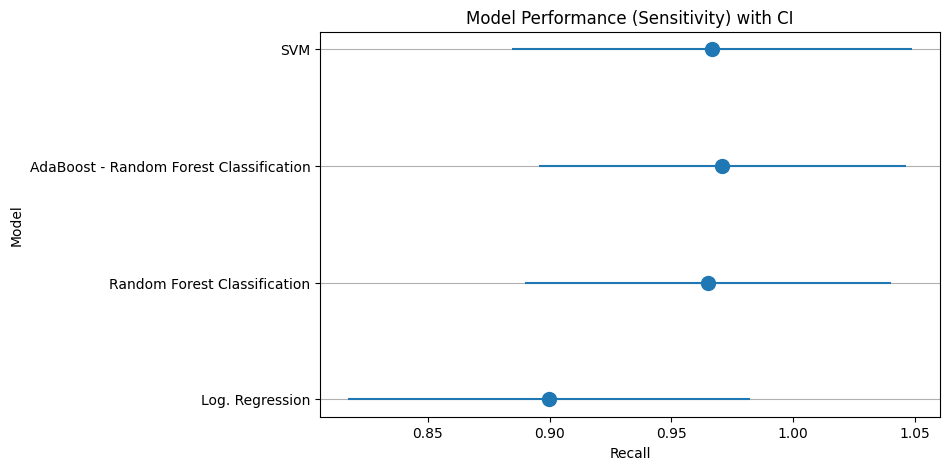

In [109]:
# List of models
model_names = ['Log. Regression', 'Random Forest Classification', 'AdaBoost - Random Forest Classification', 'SVM']

# List of accuracy scores
accuracy_scores = [mean_rec_sc_log, mean_rec_random_f, mean_rec_ada, mean_pre_svm]

# CI
ci = [1.96 * std_acc_sc_log, 1.96 * std_acc_random_f, 1.96 * std_acc_ada, 1.96 * std_acc_svm]

# Create dot plot (error bars = ci)
plt.figure(figsize=(8,5))
plt.errorbar(accuracy_scores, model_names, xerr=ci, fmt='o', markersize=10)

# Grid lines
plt.grid(axis='y')

# Labels & Titles
plt.xlabel("Recall")
plt.ylabel("Model")
plt.title("Model Performance (Sensitivity) with CI")

plt.show()